# INTRODUCTION: What are we researching?
Published by Centers for Disease Control and Prevention, a dataset was created with cumulative provisional counts of death for COVID-19 in the United States by race and educational attainment. All data was collected between January 1, 2020 through January 30, 2021. 
(Data as of February 1, 2021. Start Date: January 1, 2020. End Date: January 30, 2021)

###**The reason this dataset was chosen is because I wanted to know if there was any relation between minorities and less education status to COVID-19 deaths.**

HYPOTHESIS: 
> Racial minority groups and those with less education have a higher COVID-19-related death count than racial majority groups (non-Hispanic White) and those with higher education. 

LIMITATIONS: 
> The deaths counted by Centers for Disease Control and Prevention included COVID-19 as an underlying or multiple cause of death. We should take into account that other factors also contributed to some of the deaths in this dataset and may not fully represent death due to only COVID-19. However, it is still a reliable source because such a reason was included in the cause of deaths. Also, the age demographics are not provided in this set. Age could also be an underlying factor to higher COVID-19 death risk, amongst other missing demographics. 

METHODS USED: 
> First, I cleaned the dataset by eliminating the first three (3) columns with dates because they were irrevelant as they all had the exact same date range. Then, I renamed all the columns by putting an underscore in between the spaces so that I could easily use them while coding, avoiding any syntax errors. 

> Secondly, I looked at the value counts and data types for each category to ensure that there was an even distribution of categories in race/Hispanic origin and education level. They had the same value counts in every group, so it was a fair representation of the population demographics. For example, there were 9 counts in each race/Hispanic origin category and 8 counts in each education category.










In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

covid = pd.read_csv('AH_Provisional_COVID-19_Deaths_by_Race_and_Educational_Attainment.csv')

In [ ]:
print(covid.shape)
covid.head()

(72, 7)


,Data as of,Start Date,End Date,Education Level,Race or Hispanic Origin,COVID-19 Deaths,Total Deaths
0,02/01/2021,01/01/2020,01/30/2021,8th grade or less,Hispanic,29157,106285
1,02/01/2021,01/01/2020,01/30/2021,8th grade or less,Non-Hispanic American Indian or Alaska Native,706,3085
2,02/01/2021,01/01/2020,01/30/2021,8th grade or less,Non-Hispanic Asian,2610,16283
3,02/01/2021,01/01/2020,01/30/2021,8th grade or less,Non-Hispanic Black,5699,41437
4,02/01/2021,01/01/2020,01/30/2021,8th grade or less,Non-Hispanic More than one race,103,1676


## **Because the first 3 columns show the exact same dates for all rows, I decided to drop them because we already have a general idea of when this study took place as stated in the introduction, changing the shape of the dataset to 4 columns instead of 7.**

In [ ]:
covid = covid.drop(columns = ['Data as of'])

In [ ]:
covid = covid.drop(columns = ['Start Date'])

In [ ]:
covid = covid.drop(columns = ['End Date'])

## **Then, I renamed the columns with underscores replacing the spaces in between each word so that I might avoid any syntax errors while coding.**

In [ ]:
covid.rename(columns = {'Education Level':'Education_Level'}, inplace = True)
covid.rename(columns = {'Race or Hispanic Origin':'Race_or_Hispanic_Origin'}, inplace = True)
covid.rename(columns = {'COVID-19_Deaths':'COVID_19_Deaths'}, inplace = True)
covid.rename(columns = {'Total Deaths':'Total_Deaths'}, inplace = True)

In [ ]:
print(covid.shape)
covid.head()

(72, 4)


,Education_Level,Race_or_Hispanic_Origin,COVID_19_Deaths,Total_Deaths
0,8th grade or less,Hispanic,29157,106285
1,8th grade or less,Non-Hispanic American Indian or Alaska Native,706,3085
2,8th grade or less,Non-Hispanic Asian,2610,16283
3,8th grade or less,Non-Hispanic Black,5699,41437
4,8th grade or less,Non-Hispanic More than one race,103,1676


## **Below proves that all categories were evenly accounted for when the data was collected.**

In [ ]:
print(covid['Race_or_Hispanic_Origin'].value_counts())
print(covid['Education_Level'].value_counts())

Non-Hispanic Black                                        9
Non-Hispanic More than one race                           9
Non-Hispanic White                                        9
Hispanic                                                  9
Non-Hispanic American Indian or Alaska Native             9
Non-Hispanic Asian                                        9
Unknown                                                   9
Non-Hispanic Native Hawaiian or Other Pacific Islander    9
Name: Race_or_Hispanic_Origin, dtype: int64
Doctorate  or Professional Degree        8
Associate degree                         8
Bachelor’s degree                        8
9 -12th grade, with no diploma           8
Master’s degree                          8
8th grade or less                        8
Some college credit, but no degree       8
Unknown                                  8
High school graduate or GED completed    8
Name: Education_Level, dtype: int64


## **Below is a model summary of how the dependent variable, COVID-19 deaths, is affected by the two independent variables, Race/Hispanic Origin and Education.**

In [ ]:
from statsmodels.formula.api import ols

model = ols('COVID_19_Deaths ~ Race_or_Hispanic_Origin + Education_Level', data= covid).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        COVID_19_Deaths   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     3.725
Date:                Tue, 01 Feb 2022   Prob (F-statistic):           0.000164
Time:                        21:20:33   Log-Likelihood:                -771.17
No. Observations:                  72   AIC:                             1574.
Df Residuals:                      56   BIC:                             1611.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Given the p-values seen in the summary above, we can see that we are going to reject the null hypothesis. The p-values for all minority groups and lesser educated are bigger than the values for majority groups and high school or GED certified groups. This shows that **majority groups (non-Hispanic White) and those with a high school degree or GED certification are actually higher in COVID-19 deaths** than the latter, which we were trying to prove was the higher death count. 

# **To visualize this discovery, the following four(4) charts are provided:**

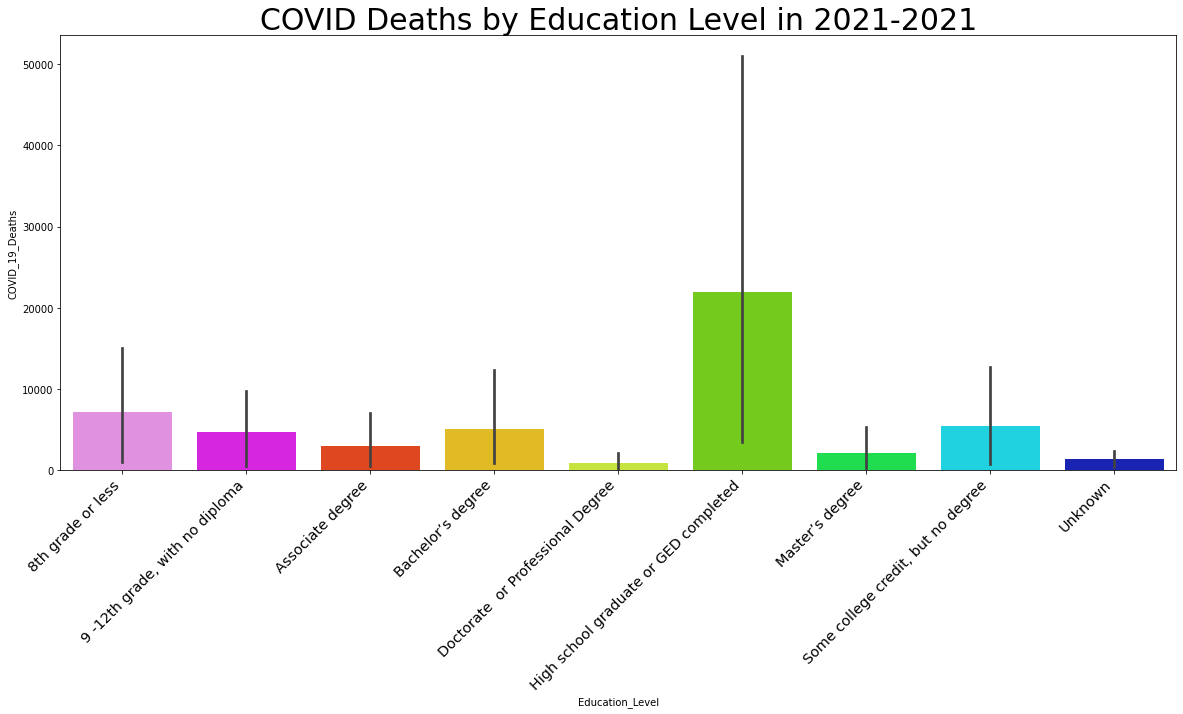

In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Education_Level', y = 'COVID_19_Deaths', data = covid, palette = 'gist_ncar_r')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title('COVID Deaths by Education Level in 2021-2021', fontdict= {'fontsize':30});

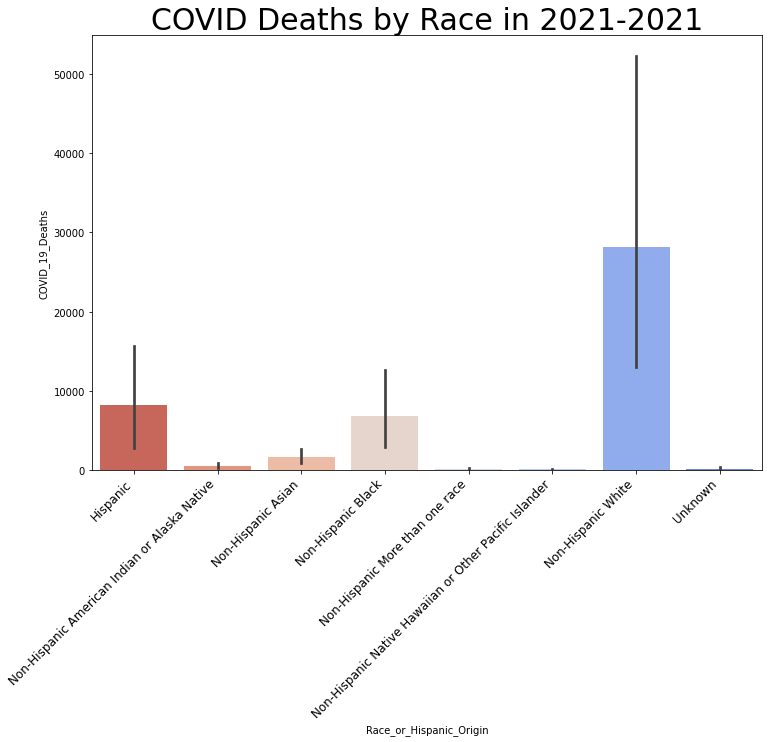

In [ ]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Race_or_Hispanic_Origin', y = 'COVID_19_Deaths', data = covid, palette = 'coolwarm_r')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('COVID Deaths by Race in 2021-2021', fontdict= {'fontsize':30});

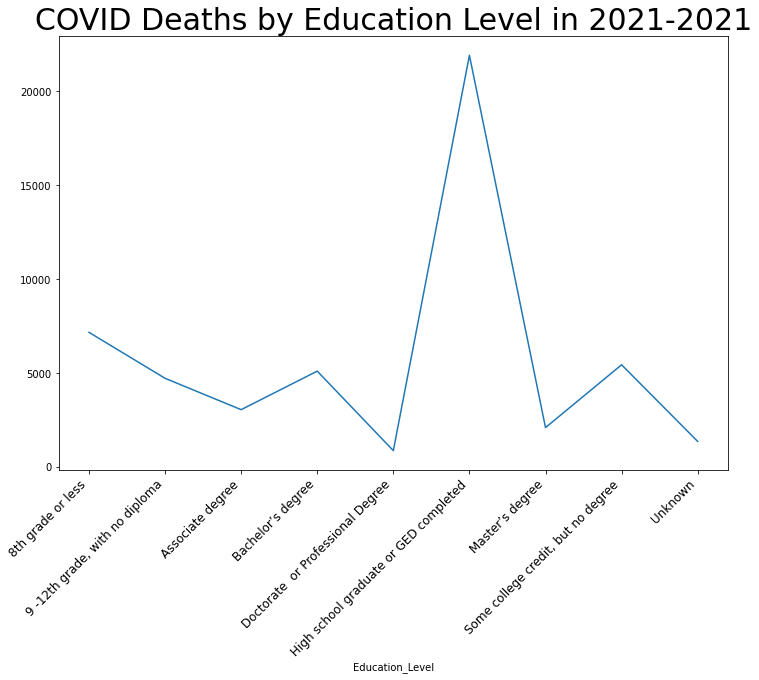

In [ ]:
plt.figure(figsize = (12, 8))
covid.groupby('Education_Level')['COVID_19_Deaths'].mean().plot()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('COVID Deaths by Education Level in 2021-2021', fontdict= {'fontsize':30});

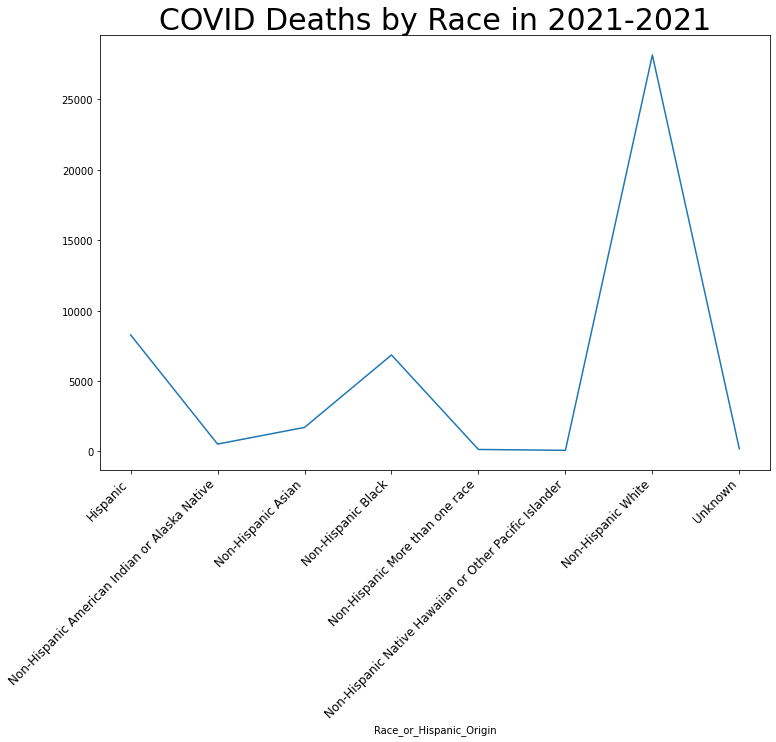

In [ ]:
plt.figure(figsize = (12, 8))
covid.groupby('Race_or_Hispanic_Origin')['COVID_19_Deaths'].mean().plot()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.title('COVID Deaths by Race in 2021-2021', fontdict= {'fontsize':30});

# CONCLUSION: What did we learn from this?

FINDINGS/CONCLUSION: 
> Based on the p-values of each category and the visualizations displayed below, **I rejected the null hypothesis that minority groups and those with less education status have a higher COVID-19-related death count than racial majority groups and those with higher education. There isn't enough information to put away the thought of some relation at all, but enough to accept the alternative hypothesis that racial minority groups and those with less education do not have a higher COVID-19-related death count than racial majority groups and those with higher education. *However*, I came to the conclusion that there was indeed a relation between majority groups and those with a high school degree or GED completed to COVID-19 deaths.**

Because of the limitations with the dataset stated above, we cannot definitively credit race/Hispanic origin and education status to the cause of why those in this sample died of COVID-19; there are other demographics to consider including *age, commons stressors amongst those of their respective education level, job workloads, other health conditions, poverty status, housing and economic conditions, etc.* 

Regardless, we now have new information that raises the question about how much those other demographics matter in COVID-19 deaths. Perhaps the new approach to this topic is to research what demographics are correlated to the actual cause of catching COVID-19, and what makes a person more likely to die from the disease than others.